In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import openpyxl as openpyxl
import random 
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


C:\Users\josep\AppData\Local\Temp\ipykernel_28092\1981358618.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import os
os.getcwd()

'c:\\Users\\josep\\OneDrive - Aarhus universitet\\Speciale\\Speciale---Stibo'

In [5]:
#file_path = r"C:\Users\uffeb\OneDrive - Aarhus universitet\Kandidat\Master\Speciale\Speciale---Stibo\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv"
file_path = r"C:\Users\josep\OneDrive - Aarhus universitet\Speciale\Speciale---Stibo\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [6]:
data = pd.read_csv(file_path)

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Checking the data types of all the columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Removing missing values 
data.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = data.iloc[:,1:]

#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

C:\Users\josep\AppData\Local\Temp\ipykernel_28092\3726204027.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
C:\Users\josep\AppData\Local\Temp\ipykernel_28092\3726204027.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [11]:
# Set the random seed
random.seed(2137)
np.random.seed(2137)

# Assuming df2 is your original DataFrame
y = df2['Churn']
X = df2.drop(['Churn'], axis=1)

# Get the numeric and categorical column names
objecttypes_num = X.select_dtypes(include=['float64', 'int64']).columns
objecttypes_cat = X.select_dtypes(include=['object']).columns

# Transformer for numerical columns
transformer_num = Pipeline([
    ('scaler', StandardScaler())
])

# Transformer for categorical columns
transformer_cat = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))
])

# Preprocessor for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_num, objecttypes_num),
        ('cat', transformer_cat, objecttypes_cat)
    ], remainder='passthrough'
)

# Standardize and one-hot encode the features
X_processed = preprocessor.fit_transform(X)


# Get the column names after transformation
processed_colnames = preprocessor.get_feature_names_out()
processed_colnames = [name.replace('num__', '').replace('cat__', '') for name in processed_colnames]

# Convert the processed features to a DataFrame
df_processed = pd.DataFrame(X_processed, columns=processed_colnames)

# Concatenate 'churn' variable to the DataFrame
df_processed['Churn'] = y.reset_index(drop=True)

In [12]:
df_processed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.440327,-1.280248,-1.161694,-0.994194,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,-0.440327,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,-0.440327,-1.239504,-0.363923,-0.959649,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,-0.440327,0.512486,-0.747850,-0.195248,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.440327,-1.239504,0.196178,-0.940457,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_processed.drop('Churn', axis=1), df_processed['Churn'], test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [2],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10],
    'min_samples_split': [5],
    'n_estimators': [10]
    }

# Initialize the RandomForestClassifier (you can choose any other classifier)
classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
n_estimators = 100
grid_search_rf = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)


# Use the best model for predictions
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)


Best Hyperparameters: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 10}


In [14]:
y_pred_rf[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=int64)

In [15]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2476,2.271039,1.164390,-1.322910,-0.344810,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6773,-0.440327,-0.546857,-1.332882,-0.801836,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6116,-0.440327,-0.791321,1.244914,-0.407790,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3047,-0.440327,0.186535,-0.324035,-0.111422,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4092,-0.440327,-1.076528,-1.174990,-0.936134,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model explainability - Local and Global interpretations

In [16]:
pip install shap

In [17]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
y_test

2476    0
6773    0
6116    1
3047    0
4092    0
       ..
1728    0
5241    0
5456    0
5842    0
3977    0
Name: Churn, Length: 1407, dtype: int64

In [19]:
best_model_rf

RandomForestClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=5,
                       n_estimators=10, random_state=0)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


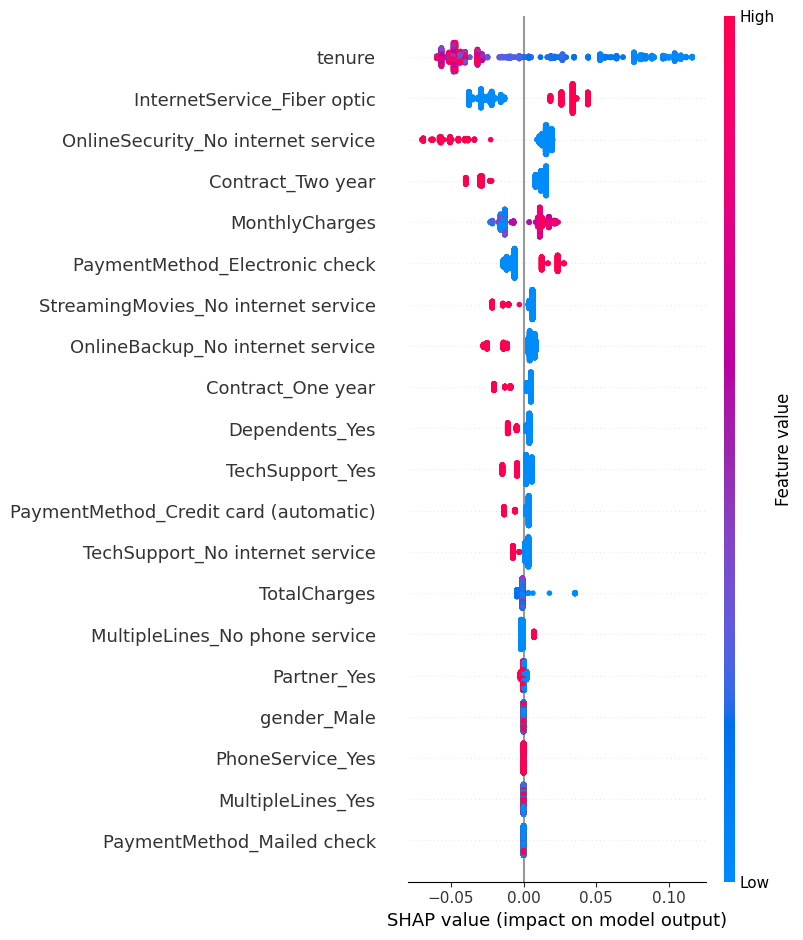

In [20]:
import shap
import matplotlib.pyplot as plt

# Create an explainer for the best model
explainer_rf = shap.Explainer(best_model_rf)

#X_test_col = X_test.columns

# Calculate SHAP values for a single prediction (change the index as needed)
#shap_values_rf = explainer_rf(X_test.iloc[1])

# Calculate SHAP values for a set of predictions
shap_values_rf = explainer_rf(X_test)

# Create an output for Churn = 1, for all X observations in the test set
shap.summary_plot(shap_values_rf[:, :, 1], X_test)

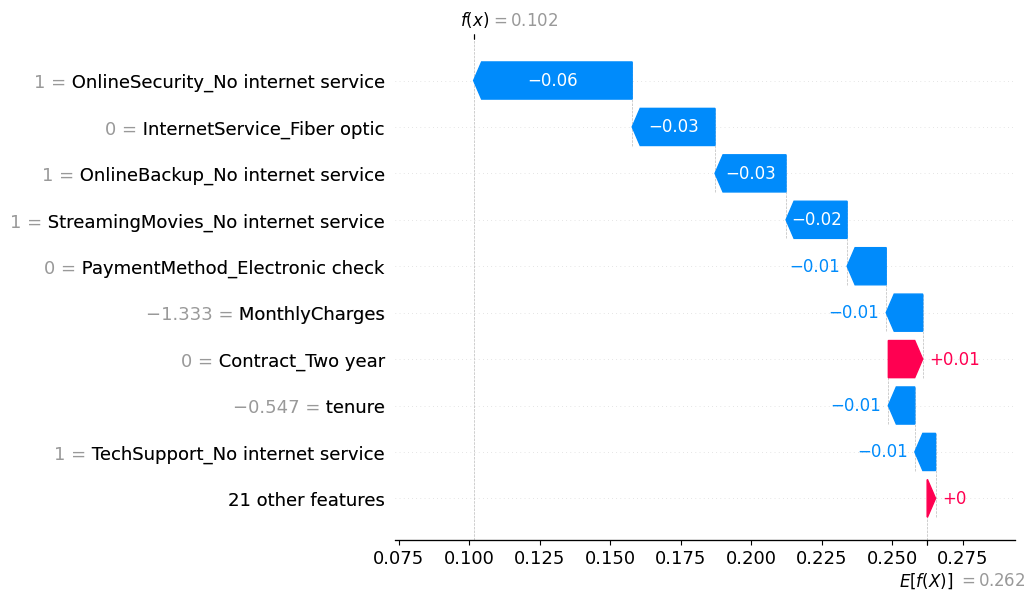

In [24]:
# Viser fordelingen af variabler for prediction i række 1, fra perspektivet churn = 0 (begge inputs kan ændres)
shap.plots.waterfall(shap_values_rf[1, :, 1])

In [22]:
shap_values_rf[:, :, 1].shape

(1407, 30)

In [26]:
# Showing a dataframe of each - 0.26 is the base value for churn = 1, for all observations. Each variable then has a SHAP-value +- the BV
shap_df = pd.DataFrame(
    np.c_[shap_values_rf[:, :, 1].base_values, shap_values_rf[:, :, 1].values],
    columns = ["ChurnBaseValue"] + list(X_test.columns)
)

In [27]:
shap_df.to_csv('shap_df_testset.csv', index=False)  # Set index=False to not write row numbers as the first column

## Next steps
1. lav agg average calc
2. afprøv flere viz
3. kan vi allerede nu lave LLM ovenpå disse SHAP værdier?